In [12]:
mpg <- as.data.frame(ggplot2::mpg)

In [13]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,2,1999,4,auto(l5),f,18,29,p,compact
audi,a4,2,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2,2008,4,auto(av),f,21,30,p,compact
audi,a4,3,1999,6,auto(l5),f,16,26,p,compact
audi,a4,3,1999,6,manual(m5),f,18,26,p,compact


0.이상치 할당

In [17]:
mpg[c(45, 120, 153, 200), 'drv'] <- 'k'

In [21]:
mpg[c(44, 98, 128, 197), 'hwy'] <- c(4, 6, 29, 44)

## drv column에 이상치 있는지 빈도표 이용하여 확인

In [23]:
table(mpg$drv)


  4   f   k   r 
101 104   4  25 

=> drv에는 '4', 'f', 'r' value들이 정상이지만, 'k'가 4개 있는 것을 확인할 수 있음.

## drv 이상치 결측 처리


In [26]:
mpg$drv <- ifelse(mpg$drv == 'k', NA, mpg$drv)
table(mpg$drv)
table(is.na(mpg$drv))


  4   f   r 
101 104  25 


FALSE  TRUE 
  230     4 

## hwy에 이상치가 있는지 상자 그림을 이용하여 확인

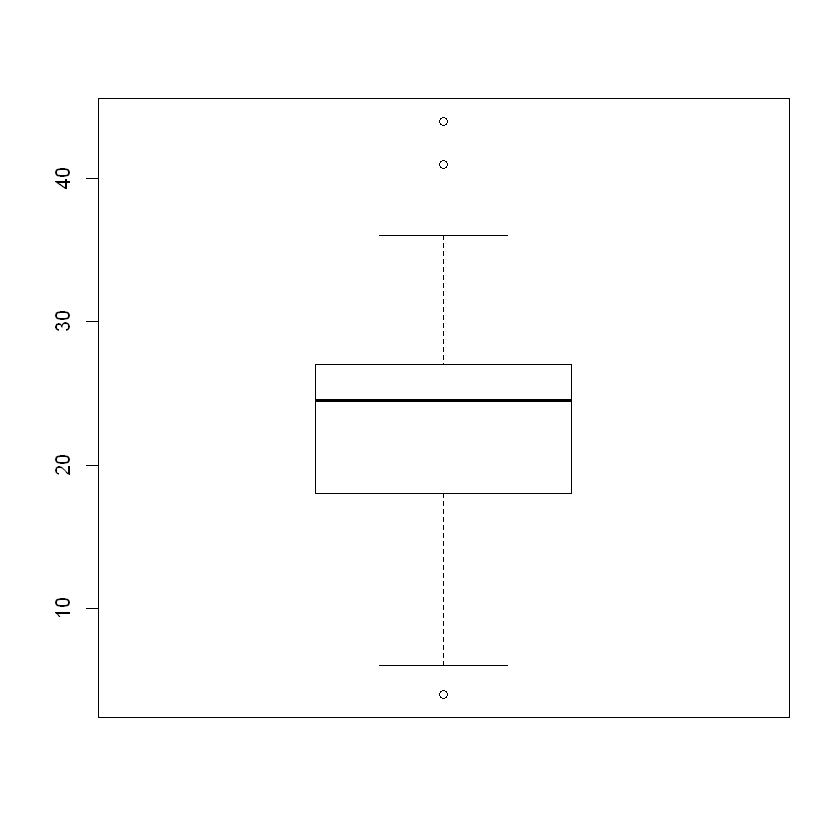

In [27]:
boxplot(mpg$hwy)

-> 이상치 확인

## 상자그림 통계치를 이용해 정상범위 벗어난 hwy값 결측 처리

6
18
24
27
36


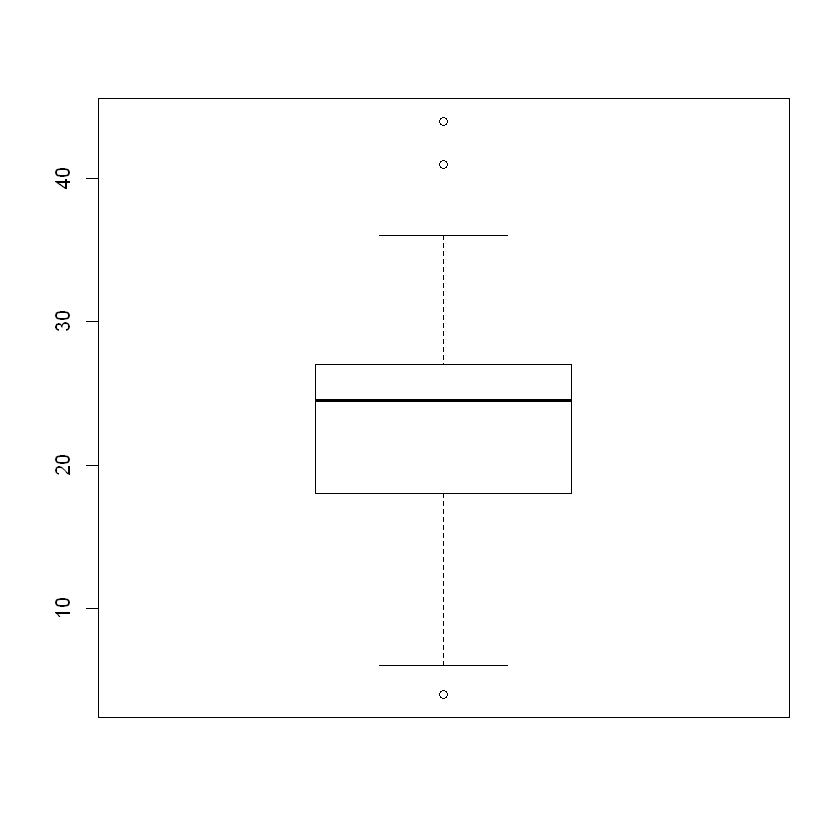

In [29]:
boxplot(mpg$hwy)$stats

In [30]:
mpg$hwy <- ifelse(mpg$hwy < 6 | mpg$hwy > 36, NA, mpg$hwy)
table(is.na(mpg$hwy))


FALSE  TRUE 
  229     5 

## mpg에 cty와 hwy가 더해진 통합연비 나타내는 total 변수 추가

In [31]:
mpg$total <- mpg$cty + mpg$hwy

In [32]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total
audi,a4,2,1999,4,auto(l5),f,18,29,p,compact,47
audi,a4,2,1999,4,manual(m5),f,21,29,p,compact,50
audi,a4,2,2008,4,manual(m6),f,20,31,p,compact,51
audi,a4,2,2008,4,auto(av),f,21,30,p,compact,51
audi,a4,3,1999,6,auto(l5),f,16,26,p,compact,42
audi,a4,3,1999,6,manual(m5),f,18,26,p,compact,44


## 어떤 class의 hwy가 높은지 비교하기. 
class별 hwy 평균 구하기 (단, 결측치 있는 경우는 데이터를 제외)

In [36]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [37]:
mpg %>%
    filter(!is.na(hwy)) %>%
    group_by(class) %>%
    summarise(mean_hwy = mean(hwy))

class,mean_hwy
2seater,25
compact,28
midsize,27
minivan,23
pickup,17
subcompact,27
suv,18


-> 차종(class)별 고속도로 연비 평균은 'compact'가 가장 높음을 알 수 있다.

## 어떤 회사(manufacturer)에서 'suv'를 가장 많이 생산하는 지 알아보기
각 회사별 suv 차종 수를 정렬하여 상위 5개만 출력

In [38]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total
audi,a4,2,1999,4,auto(l5),f,18,29,p,compact,47
audi,a4,2,1999,4,manual(m5),f,21,29,p,compact,50
audi,a4,2,2008,4,manual(m6),f,20,31,p,compact,51
audi,a4,2,2008,4,auto(av),f,21,30,p,compact,51
audi,a4,3,1999,6,auto(l5),f,16,26,p,compact,42
audi,a4,3,1999,6,manual(m5),f,18,26,p,compact,44


In [51]:
no_suv <-mpg %>%
        filter(mpg$class=='suv') %>%
        group_by(manufacturer) %>%
        summarise(n = n()) %>%
        arrange(desc(n)) %>%
        head(5)
no_suv

manufacturer,n
chevrolet,9
ford,9
jeep,8
toyota,8
dodge,7


In [49]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked _by_ '.GlobalEnv':

    mpg



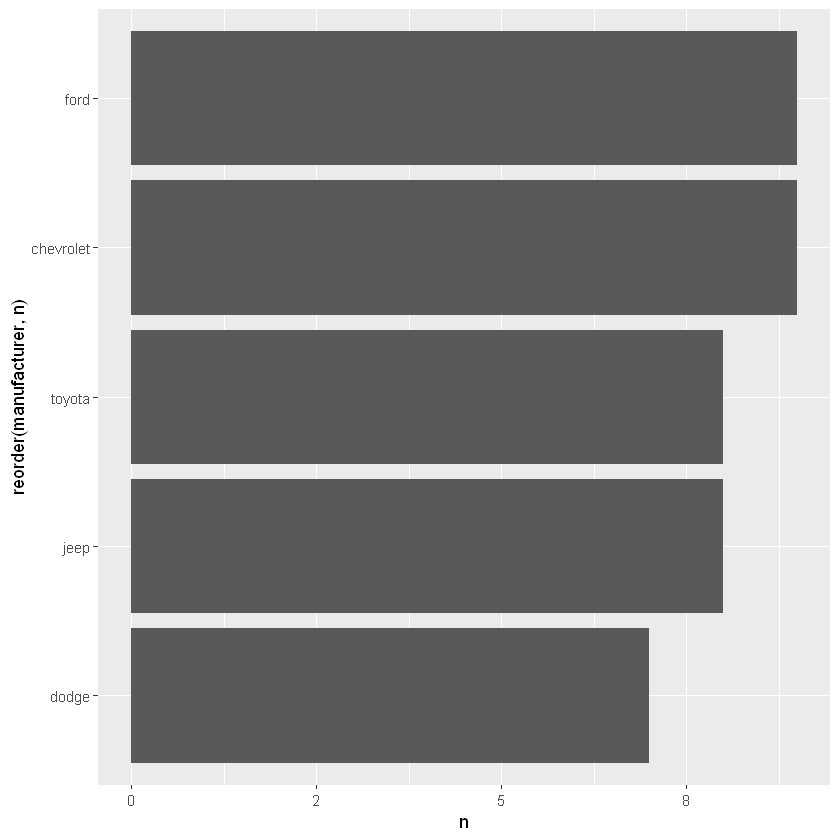

In [53]:
ggplot(no_suv, aes(x = reorder(manufacturer, n), y=n)) +
    geom_col() +
    coord_flip()